# Venues İstanbul
##  Problem Statement : 

İstanbul is most popular  city in Turkey and more than 15 million people choosing this beatifull city for their holiday every year from abroad. In this favourit holiday city, there are many many restaurants and cafes of different ambiance from many different food cultures. also there are many diffrent beachs resorts int this city.Traditional turkish cuisine, italian pizza restaurants, seafood restaurants, authentic middle east cafes, delicious kebab restaurants, turkish coffee, fast food, bistros, so many options for a tourist

-  -

##  Problem Discussion:
There is not enough time for a tourist who has been come  on vacation for 10 days to get the experience up to the right place to choose the right restaurant for dinner.there is no time for a tourist to learn which restaurant is cooking better or which restaurant is cooking more delicious fish or which bar is making better music

## Library Importing


In [1]:
# libraries for handle data and  data analsysis
import numpy as np 
import pandas as pd 
import json 

# handle requests libraries
import requests
from pandas.io.json import json_normalize

# Visiulation tools
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means 
from sklearn.cluster import KMeans



# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes ## install folium
import folium 

# beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

##


print('librariy importing is done !!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

librariy importing is done !!


## Fetching data from fourSquare
We got ClientID and ClientSecret and we learned how we fetch data from fourSquare in earlier week

#### Getting Antalya geograpical coordinates with geopy

In [2]:
cntr = 'istanbul, Turkey'

geolocator = Nominatim()
location = geolocator.geocode(cntr)
latitude = location.latitude
longitude = location.longitude
print('Coordinates: {}, {}.'.format(latitude, longitude))

/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


Coordinates: 41.0766019, 29.052495.


#### Setting FourSquare Request

In [3]:
## Your Api ClientID adn ClientSecret
CLIENT_ID = '5ONQYHNWGBZ4O0RJPBCSSWV4R2JRSNRKNUNNBLJIY4D42DEI' 
CLIENT_SECRET = 'BUKLQNAH1XVPOKXOVB0N0BZFUWYAHMY44CKPXQFZUL54I43V'

# Foursquare API version
VERSION = '20200404' 
radius  = 5000

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 5000 


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,      
    LIMIT,
    radius)
print('Request Url:' + url)

CLIENT_ID: 5ONQYHNWGBZ4O0RJPBCSSWV4R2JRSNRKNUNNBLJIY4D42DEI
CLIENT_SECRET:BUKLQNAH1XVPOKXOVB0N0BZFUWYAHMY44CKPXQFZUL54I43V
Request Url:https://api.foursquare.com/v2/venues/explore?&client_id=5ONQYHNWGBZ4O0RJPBCSSWV4R2JRSNRKNUNNBLJIY4D42DEI&client_secret=BUKLQNAH1XVPOKXOVB0N0BZFUWYAHMY44CKPXQFZUL54I43V&v=20200404&ll=41.0766019,29.052495&limit=5000&radius=5000


#### Json data


In [4]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9e9dd00f59680026e01cce'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'With specials', 'key': 'specials'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 208,
  'suggestedBounds': {'ne': {'lat': 41.121601945000045,
    'lng': 29.112078617591987},
   'sw': {'lat': 41.031601854999955, 'lng': 28.992911382408014}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50377a92e4b0fc42f6c6bb79',
       'name': 'İoki',
       'location': {'address': 'Kandilli Cad. No: 11/A',
        'lat': 41.07389303418123,
        'lng': 29.05780135224753,
        'labeledLatLng

#### How we can use this data ?
Using Geolocator one can get the latitude and Longitude values of a particular place after fetching these values we can use Forsquare API calls on these places and gather the venues that are currently happening around.
we can get venue categories from this data and  we can determine top venues for each category by like counts

### 1- Creating dataframe

In [5]:
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [6]:
#Scraping data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtering category
nearby_venues['venue.categories'] = nearby_venues.apply(get_category, axis=1)

nearby_venues

/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801
1,Kandilli Sahili,4d7f764d564b8cfa42840565,Beach,41.074378,29.059562
2,Adile Sultan Sarayı,4e1d862ac65b6cd0da9b2086,Historic Site,41.072159,29.058089
3,Mithat Alam Film Merkezi,4d959f46942ba0934c733e8c,Movie Theater,41.082960,29.050284
4,Bebek Parkı,4b811ccdf964a520379730e3,Park,41.076294,29.044012
...,...,...,...,...,...
95,Cup of Joy,5730bf4d498e9d5244e895a9,Coffee Shop,41.065425,29.018019
96,Kanlıca Sahili,4c14b748a1010f4740da4c18,Waterfront,41.099706,29.075694
97,Zorlu Center Park,527e37d511d299685ade1145,Garden,41.067336,29.015274
98,Abant Kahvecisi,58cedc897b88a71aacfedfb4,Coffee Shop,41.050100,29.053721


In [7]:
#fix the column names 

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801
1,Kandilli Sahili,4d7f764d564b8cfa42840565,Beach,41.074378,29.059562
2,Adile Sultan Sarayı,4e1d862ac65b6cd0da9b2086,Historic Site,41.072159,29.058089
3,Mithat Alam Film Merkezi,4d959f46942ba0934c733e8c,Movie Theater,41.082960,29.050284
4,Bebek Parkı,4b811ccdf964a520379730e3,Park,41.076294,29.044012
...,...,...,...,...,...
95,Cup of Joy,5730bf4d498e9d5244e895a9,Coffee Shop,41.065425,29.018019
96,Kanlıca Sahili,4c14b748a1010f4740da4c18,Waterfront,41.099706,29.075694
97,Zorlu Center Park,527e37d511d299685ade1145,Garden,41.067336,29.015274
98,Abant Kahvecisi,58cedc897b88a71aacfedfb4,Coffee Shop,41.050100,29.053721


In [8]:
cat_array = nearby_venues['categories'].unique()
cat_array

array(['Sushi Restaurant', 'Beach', 'Historic Site', 'Movie Theater',
       'Park', 'Coffee Shop', 'Lounge', 'Art Museum', 'Waterfront',
       'Steakhouse', 'Hotel', 'Scenic Lookout', 'Restaurant',
       'Dessert Shop', 'Castle', 'Seafood Restaurant',
       'Cajun / Creole Restaurant', 'Manti Place', 'Tea Room', 'Mountain',
       'Art Gallery', 'Café', 'Gym / Fitness Center', 'Bookstore',
       'Furniture / Home Store', 'Gym', 'Vegetarian / Vegan Restaurant',
       'Other Great Outdoors', 'Yoga Studio', 'Athletics & Sports',
       'Kebab Restaurant', 'Residential Building (Apartment / Condo)',
       'Nightclub', 'Tennis Stadium', 'Pastry Shop', 'Cosmetics Shop',
       'Lighthouse', 'Bakery', 'Music Venue', 'Sporting Goods Shop',
       'Arts & Crafts Store', 'Pizza Place', 'Garden', 'Shop & Service',
       'Concert Hall', 'Mosque', 'Salon / Barbershop',
       'Performing Arts Venue', 'Diner'], dtype=object)

we want to suggest to people restourant and cafe. Therefor we have to filter category array

In [93]:
def cat_filter(cat_arr, filter_words):
    new_array=[]
    for a in cat_arr:
        for b in filter_words:
            if b in a:
                new_array.append(a)
    return list(set(new_array))           
                

In [94]:
#we want to suggest to people restourant or cafe. Therefor we have to filter category array


new_cat_array = cat_filter(cat_array, ['Restaurant', 'Café', 'Kebab', 'Diner', 'Pizza', 'Steakhouse'])
new_cat_array

['Seafood Restaurant',
 'Cajun / Creole Restaurant',
 'Steakhouse',
 'Sushi Restaurant',
 'Restaurant',
 'Café',
 'Vegetarian / Vegan Restaurant',
 'Kebab Restaurant',
 'Diner',
 'Pizza Place']

#### getting datas  restourants or caffes and likes

In [95]:
## getting restourants or caffes
venues_data = nearby_venues.loc[nearby_venues['categories'].isin(new_cat_array)]
venues_data

,name,id,categories,lat,lng
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801
10,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166
34,Muhit Tobacco & Coffee Shop,55382bf6498e53f7c21f54c6,Café,41.086460,29.047818
38,Nusr-Et Steakhouse,4fcf83e8e4b0d44b55e64acc,Steakhouse,41.080561,29.033429
40,Bi Nevi Deli,56655e49498e2a648b4dadd3,Vegetarian / Vegan Restaurant,41.079738,29.033232


In [52]:
#getting id list

id_list = venues_data['id'].tolist()
id_list

['50377a92e4b0fc42f6c6bb79',
 '4c28cbf63492a593efe3b728',
 '4bdb334dc79cc928f39b81e9',
 '4d28bd55849f3704b2257741',
 '5992da31ca18ea65323cfa56',
 '4c52f7547f6e20a1aae966ec',
 '55382bf6498e53f7c21f54c6',
 '56655e49498e2a648b4dadd3',
 '5773ba3c498e63c34d6aacd1',
 '4b66b8dff964a520a7282be3',
 '4c753eb13adda14327b606af',
 '5b18201ff62f2b002cf2afb7',
 '5550cd42498e75da5efa6f0f',
 '5176610e498efe5001ae652e',
 '4c07fd3cffb8c9b6b48a6761',
 '584298a7dfa6ff53e05ce9c8',
 '4bd710da29eb9c74ab1796e1',
 '57a1cc8b498e898a681abefa',
 '5711375c498eaa8b74bbef2c',
 '5957b64a840fc216ec1c83f1',
 '5743104a498e6adb99b3ce0b']

In [53]:
## getting like counts


url_list = []
like_list = []
json_list = []

for i in id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


[822, 327, 395, 100, 380, 1671, 24, 230, 54, 3200, 2918, 29, 430, 575, 710, 47, 504, 19, 321, 45, 61]


In [54]:
## adding like numbers to data frame


venues_data['Likes'] = like_list
venues_data

/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,id,categories,lat,lng,Likes
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448,327
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680,100
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166,1671
34,Muhit Tobacco & Coffee Shop,55382bf6498e53f7c21f54c6,Café,41.086460,29.047818,24
40,Bi Nevi Deli,56655e49498e2a648b4dadd3,Vegetarian / Vegan Restaurant,41.079738,29.033232,230
41,Wuufbox,5773ba3c498e63c34d6aacd1,Café,41.065588,29.041184,54
48,Sunset Grill & Bar,4b66b8dff964a520a7282be3,Restaurant,41.064121,29.033130,3200


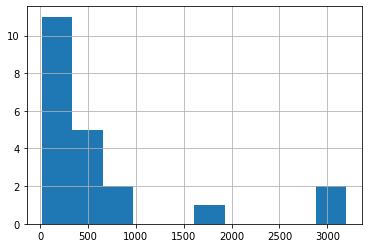

In [55]:
venues_data['Likes'].hist()
plt.show()

In [56]:
venues_data.sort_values(by=['Likes'],ascending=False)

,name,id,categories,lat,lng,Likes
48,Sunset Grill & Bar,4b66b8dff964a520a7282be3,Restaurant,41.064121,29.033130,3200
50,Lacivert Restaurant,4c753eb13adda14327b606af,Seafood Restaurant,41.091380,29.066438,2918
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166,1671
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822
68,Mavi Balık Restaurant,4c07fd3cffb8c9b6b48a6761,Seafood Restaurant,41.058035,29.035684,710
61,Inari Omakase,5176610e498efe5001ae652e,Sushi Restaurant,41.059915,29.036412,575
77,Olivia's Pizzeria,4bd710da29eb9c74ab1796e1,Pizza Place,41.073497,29.020494,504
53,İoki,5550cd42498e75da5efa6f0f,Sushi Restaurant,41.074872,29.027626,430
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380


In [57]:
# now let's bin total likes

max_l = venues_data['Likes'].max()
min_l = venues_data['Likes'].min()
median_l = venues_data['Likes'].median()
mean_l = venues_data['Likes'].mean()


##print ( 'mean={}, median={}, max value = {}, min value={}'.format(mean_l, median_l, max_l, min_l)  )
print('mean = '+str(mean_l))
print('median = '+str(median_l))
print('max = '+str(max_l))
print('min = '+str(min_l))

mean = 612.4761904761905
median = 327.0
max = 3200
min = 19


#### Rating the Venues Based on Total likes

In [16]:
# what are the bins we want to use?
q_1 = np.percentile(venues_data['Likes'], 25)
q_2 = np.percentile(venues_data['Likes'], 50)
q_3 = np.percentile(venues_data['Likes'], 75)
print(q_1)
print(q_2)
print(q_3)

57.5
327.0
642.5


In [ ]:
# now we have our bin values so let's set them to the appropriate values

# poor, below avg, abv avg, great


In [58]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['Likes']<=q_1:
        return 'poor'
    if s['Likes']<=q_2:
        return 'below avg'
    if s['Likes']<=q_3:
        return 'avg avg'
    if s['Likes']>q_3:
        return 'great'

venues_data['Like Cat']=venues_data.apply(conditions, axis=1)
venues_data

/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,name,id,categories,lat,lng,Likes,Like Cat
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822,great
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448,327,below avg
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395,avg avg
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680,100,below avg
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380,avg avg
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166,1671,great
34,Muhit Tobacco & Coffee Shop,55382bf6498e53f7c21f54c6,Café,41.086460,29.047818,24,poor
40,Bi Nevi Deli,56655e49498e2a648b4dadd3,Vegetarian / Vegan Restaurant,41.079738,29.033232,230,below avg
41,Wuufbox,5773ba3c498e63c34d6aacd1,Café,41.065588,29.041184,54,poor
48,Sunset Grill & Bar,4b66b8dff964a520a7282be3,Restaurant,41.064121,29.033130,3200,great


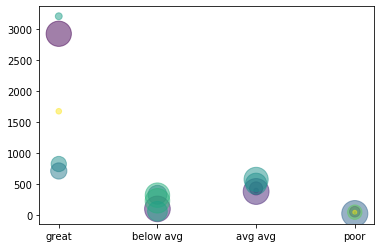

In [59]:
import matplotlib.pyplot as plt
N = len(venues_data)
x = venues_data['Like Cat']
y = venues_data['Likes'] #np.random.rand(N)

colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()



### K-Means Clustering
#### set type

In [62]:

Cafe = ['Hotel', 'Bagel Shop', 'Bakery', 'Coffee Shop', 'Café', 'Sandwich Place', 'Bubble Tea Shop', 'Wine Shop', 'Plaza',  'Breakfast Spot', 'Salad Place']
restaurant = ['Falafel Restaurant','Restaurant', 'Italian Restaurant','Seafood Restaurant', 'Steakhouse','Korean Restaurant', 'Cuban Restaurant', 'Fast Food Restaurant', 'Japanese Restaurant',
                         'Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Greek Restaurant', 'French Restaurant', 
                          'Japanese Curry Restaurant', 'Vegetarian / Vegan Restaurant','Asian Restaurant']

italian= ['Italian Restaurant', 'Cajun / Creole Restaurant', 'Pizza Place']

def type_set(s):
    if s['categories'] in Cafe:
        return 'Cafe'
    if s['categories'] in restaurant:
        return 'restaurant'
    if s['categories'] in italian:
        return 'Italian'
venues_data['type']=venues_data.apply(type_set, axis=1)
venues_data


/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,name,id,categories,lat,lng,Likes,Like Cat,type
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822,great,restaurant
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448,327,below avg,restaurant
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395,avg avg,restaurant
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680,100,below avg,Italian
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380,avg avg,Cafe
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166,1671,great,restaurant
34,Muhit Tobacco & Coffee Shop,55382bf6498e53f7c21f54c6,Café,41.086460,29.047818,24,poor,Cafe
40,Bi Nevi Deli,56655e49498e2a648b4dadd3,Vegetarian / Vegan Restaurant,41.079738,29.033232,230,below avg,restaurant
41,Wuufbox,5773ba3c498e63c34d6aacd1,Café,41.065588,29.041184,54,poor,Cafe
48,Sunset Grill & Bar,4b66b8dff964a520a7282be3,Restaurant,41.064121,29.033130,3200,great,restaurant


### One hat encoding

In [64]:
# one hot encoding
venues_data_onehot = pd.get_dummies(venues_data[['type', 'Like Cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_data_onehot['Name'] = venues_data['name'] 

# move neighborhood column to the first column
fixed_columns = [venues_data_onehot.columns[-1]] + list(venues_data_onehot.columns[:-1])
venues_data_onehot = venues_data_onehot[fixed_columns]

venues_data_onehot.head()

,Name,Cafe,Italian,restaurant,avg avg,below avg,great,poor
0,İoki,0,0,1,0,0,1,0
13,Kennedy Lodge,0,0,1,0,1,0,0
19,Akıntı Burnu Restaurant,0,0,1,1,0,0,0
20,Rago Balik,0,1,0,0,1,0,0
29,Zoom Rumelihisarı,1,0,0,1,0,0,0


In [65]:
cluster_df = venues_data_onehot.drop('Name', axis=1)

k_clusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 1, 3, 1, 2, 0, 3, 0, 2], dtype=int32)

In [67]:
venues_data['label'] = kmeans.labels_
venues_data.head()

/home/savas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,id,categories,lat,lng,Likes,Like Cat,type,label
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822,great,restaurant,2
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448,327,below avg,restaurant,3
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395,avg avg,restaurant,1
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680,100,below avg,Italian,3
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380,avg avg,Cafe,1


### Creating map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) ##np.random.rand(N)
rainbow =[] ## [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_data['lat'], venues_data['lng'], venues_data['name'], venues_data['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='#3c763d',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# Results 

###  Clustering

### shows the rating for poor quality of venues

In [83]:
venues_data.loc[venues_data['label']==0]

,name,id,categories,lat,lng,Likes,Like Cat,type,label
34,Muhit Tobacco & Coffee Shop,55382bf6498e53f7c21f54c6,Café,41.086460,29.047818,24,poor,Cafe,0
41,Wuufbox,5773ba3c498e63c34d6aacd1,Café,41.065588,29.041184,54,poor,Cafe,0
51,Tike Etiler,5b18201ff62f2b002cf2afb7,Kebab Restaurant,41.086600,29.032461,29,poor,None,0
75,Imperia Pizza & Sandwiches,584298a7dfa6ff53e05ce9c8,Café,41.093625,29.032860,47,poor,Cafe,0
79,Suma Cafe Restaurant/Göksu Evleri,57a1cc8b498e898a681abefa,Restaurant,41.082145,29.086457,19,poor,restaurant,0
92,Ragu Lokanta,5957b64a840fc216ec1c83f1,Diner,41.063526,29.018485,45,poor,None,0


###  shows rating for Great quality of veues

In [85]:
venues_data.loc[venues_data['label']==1]

,name,id,categories,lat,lng,Likes,Like Cat,type,label
19,Akıntı Burnu Restaurant,4bdb334dc79cc928f39b81e9,Seafood Restaurant,41.067988,29.045863,395,avg avg,restaurant,1
29,Zoom Rumelihisarı,5992da31ca18ea65323cfa56,Café,41.088074,29.056546,380,avg avg,Cafe,1
53,İoki,5550cd42498e75da5efa6f0f,Sushi Restaurant,41.074872,29.027626,430,avg avg,restaurant,1
61,Inari Omakase,5176610e498efe5001ae652e,Sushi Restaurant,41.059915,29.036412,575,avg avg,restaurant,1
77,Olivia's Pizzeria,4bd710da29eb9c74ab1796e1,Pizza Place,41.073497,29.020494,504,avg avg,Italian,1


### shows avg rated category venues

In [87]:
venues_data.loc[venues_data['label']==2]

,name,id,categories,lat,lng,Likes,Like Cat,type,label
0,İoki,50377a92e4b0fc42f6c6bb79,Sushi Restaurant,41.073893,29.057801,822,great,restaurant,2
32,Arnavutköy Balıkçısı,4c52f7547f6e20a1aae966ec,Seafood Restaurant,41.066640,29.042166,1671,great,restaurant,2
48,Sunset Grill & Bar,4b66b8dff964a520a7282be3,Restaurant,41.064121,29.033130,3200,great,restaurant,2
50,Lacivert Restaurant,4c753eb13adda14327b606af,Seafood Restaurant,41.091380,29.066438,2918,great,restaurant,2
68,Mavi Balık Restaurant,4c07fd3cffb8c9b6b48a6761,Seafood Restaurant,41.058035,29.035684,710,great,restaurant,2


### Shows below Average Rated venues

In [89]:
venues_data.loc[venues_data['label']==3]

,name,id,categories,lat,lng,Likes,Like Cat,type,label
13,Kennedy Lodge,4c28cbf63492a593efe3b728,Restaurant,41.083710,29.054448,327,below avg,restaurant,3
20,Rago Balik,4d28bd55849f3704b2257741,Cajun / Creole Restaurant,41.068703,29.043680,100,below avg,Italian,3
40,Bi Nevi Deli,56655e49498e2a648b4dadd3,Vegetarian / Vegan Restaurant,41.079738,29.033232,230,below avg,restaurant,3


# Discussion :

 From the above results we can state that the grouping of cuisines based on their rating is done very accurately but the results may have a limitation of accuracy as the whole results are based on the data we fetch from the Foursquare API calls hence further more advancements can be made by considering huge amounts of data.

# Conclusion :

  
In this project, we tried to categorize the venues in Istanbul according to the numberof like  and type.We can say that we have achieved a successful result even though the FourSquare data is very low for Istanbul. Alsowe can say it is very useful For tourists who want to travel around the city and discover new quality venues. Therefor this work colud be  very useful for some company that creating advice programs and applications for tourist